In [21]:
from IPython.display import Image
import numpy as np
import pandas as pd
import graphviz 
import pydotplus
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, RepeatedKFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,ElasticNet
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_wine
from io import StringIO 
%matplotlib inline 
pd.set_option("display.max_rows", None, "display.max_columns", None)
sns.set(style="ticks")

In [22]:
data = pd.read_csv("/home/igor/Downloads/CarPrice_Assignment.xls",sep=',')
data.shape

(205, 26)

In [23]:
cleanup_nums = {"doornumber":     {"four": 1, "two": 0},
                "cylindernumber": {"four": 4, "six": 6, "five": 5, "eight": 8,
                                  "two": 2, "twelve": 12, "three":3 },
                "aspiration":{"std": 0, "turbo": 1},
                "fueltype":{"gas": 0, "diesel": 1},
                "enginelocation":{"front": 0, "rear": 1}}
data = data.replace(cleanup_nums)
data=pd.get_dummies(data, columns=["drivewheel"], prefix=["drive"])
data=pd.get_dummies(data, columns=["carbody"], prefix=["body"])
data["OHC_Code"] = np.where(data["enginetype"].str.contains("ohc"), 1, 0)
data.drop(data[(data['aspiration']=='turbo')].index,inplace=True)
data.drop(data[(data['fueltype']=='diesel')].index,inplace=True)
data.drop(["CarName","enginetype","fuelsystem","symboling","car_ID"],axis=1,inplace=True)


In [24]:
data_X = data.loc[:,data.columns]
clnm = StandardScaler()
data_X = clnm.fit_transform(data_X)
data_X = pd.DataFrame(data_X,columns=data.columns)
data_Y = data.loc[:, 'price']
data_X.drop(['price'],axis=1,inplace=True)
data_X_train, data_X_test, data_y_train, data_y_test = train_test_split(
    data_X, data_Y,test_size=0.4, random_state=360)
data_Y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [25]:
data_X.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,drive_4wd,drive_fwd,drive_rwd,body_convertible,body_hardtop,body_hatchback,body_sedan,body_wagon,OHC_Code
0,-0.328798,-0.469295,-1.130388,-0.121867,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,-0.352887,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,-0.214286,-1.188177,1.302831,5.759051,-0.201517,-0.720082,-0.938474,-0.372678,0.290957
1,-0.328798,-0.469295,-1.130388,-0.121867,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,-0.352887,0.074449,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,-0.214286,-1.188177,1.302831,5.759051,-0.201517,-0.720082,-0.938474,-0.372678,0.290957
2,-0.328798,-0.469295,-1.130388,-0.121867,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,1.502032,0.604046,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,-0.691627,-0.214286,-1.188177,1.302831,-0.173640,-0.201517,1.388730,-0.938474,-0.372678,0.290957
3,-0.328798,-0.469295,0.884652,-0.121867,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.352887,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,-0.109354,-0.214286,0.841625,-0.767559,-0.173640,-0.201517,-0.720082,1.065559,-0.372678,0.290957
4,-0.328798,-0.469295,0.884652,-0.121867,0.107110,0.207256,0.230001,0.235942,0.516807,0.574572,0.218885,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,-1.273900,4.666667,-1.188177,-0.767559,-0.173640,-0.201517,-0.720082,1.065559,-0.372678,0.290957


In [26]:
#data_X = data_X.to_numpy()
#data_Y = data_Y.to_numpy()
data_X_train, data_X_test, data_Y_train, data_Y_test = train_test_split(
    data_X, data_Y,test_size=0.4, random_state=360)
data_X_train.shape

(123, 27)

<h1>1я модель</h1>

In [27]:
from sklearn.ensemble import BaggingRegressor
reg1 = BaggingRegressor(base_estimator =  ElasticNet(tol=1e-1),n_estimators = 5,oob_score=True, random_state=10)
reg1.fit(data_X_train,data_Y_train)

/home/igor/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:1069: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


BaggingRegressor(base_estimator=ElasticNet(tol=0.1), n_estimators=5,
                 oob_score=True, random_state=10)

In [29]:
target1_0=reg1.predict(data_X_test)
r2_score(data_Y_test, target1_0)

0.8312979740120918

In [30]:
# Визуализация дерева
def get_png_tree(tree_model_param, feature_names_param):
    dot_data = StringIO()
    export_graphviz(tree_model_param, out_file=dot_data, feature_names=feature_names_param,
                    filled=True, rounded=True, special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph.create_png()

In [31]:
scores = cross_val_score(reg1, data_X, data_Y, cv=RepeatedKFold(n_splits=3, n_repeats=3))
print("%0.2f r^2 with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.81 r^2 with a standard deviation of 0.03
/home/igor/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:1069: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/igor/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:1069: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/igor/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:1069: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/igor/.local/lib/python3.9/site-packages/sklearn/ensemble/_bagging.py:1069: UserWarning: Some inputs do not have OOB scores. This probably means too few estimat

<h1>2я модель</h1>

In [32]:
reg2 = RandomForestRegressor(n_estimators=6, oob_score=True, random_state=10,max_depth=4)
reg2.fit(data_X_train,data_y_train)

/home/igor/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RandomForestRegressor(max_depth=4, n_estimators=6, oob_score=True,
                      random_state=10)

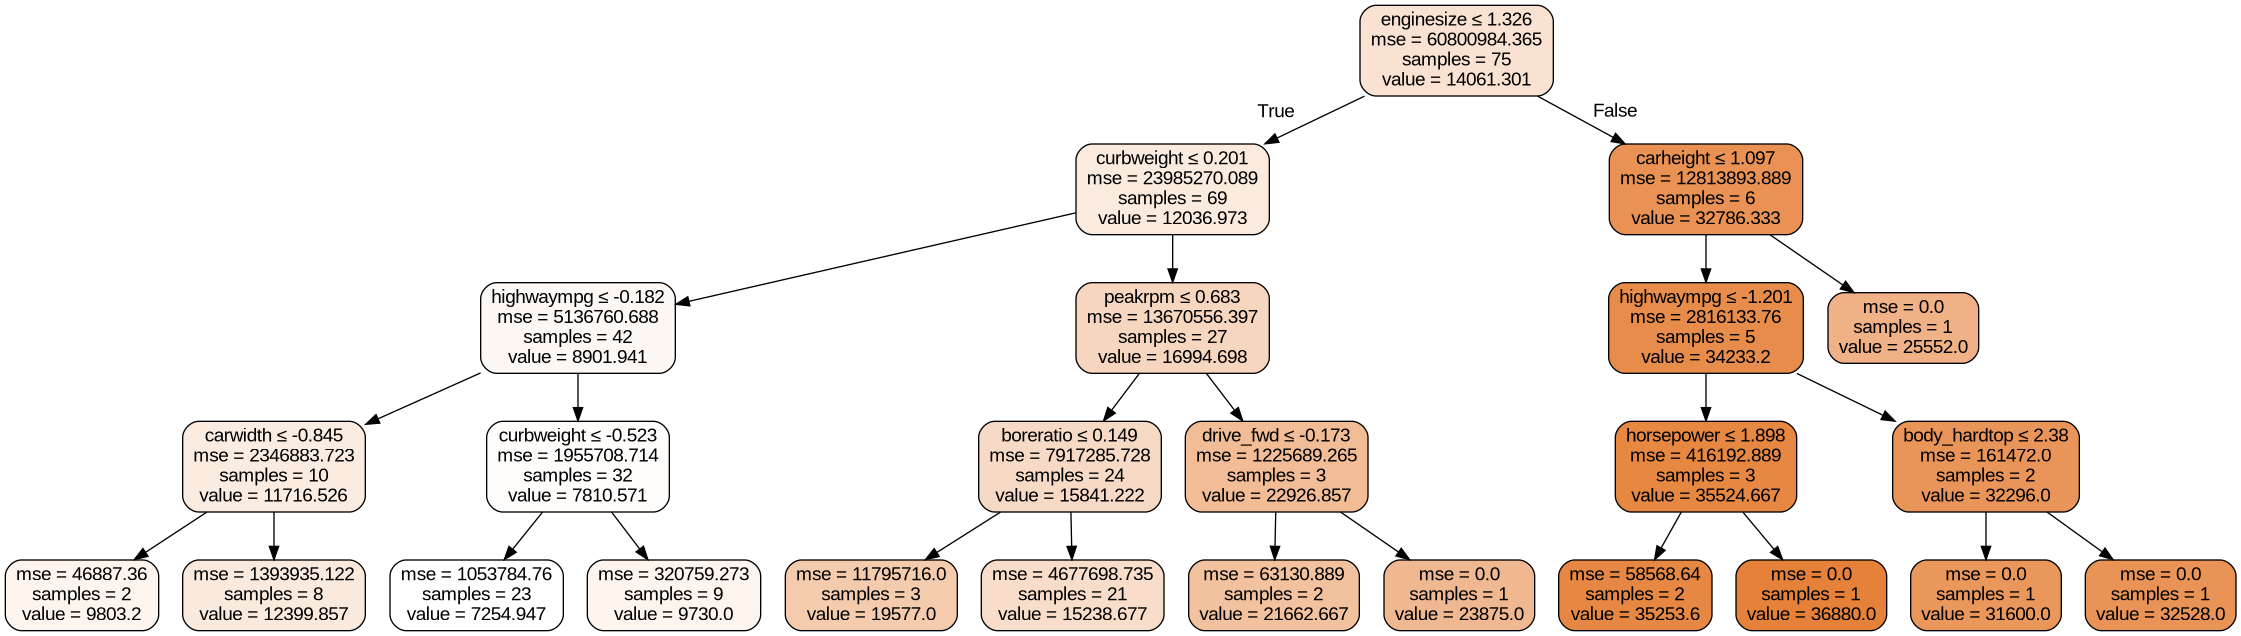

In [33]:
Image(get_png_tree(reg2.estimators_[5], data_X.columns), width="500")

In [34]:
reg2.oob_score_ , 1-reg2.oob_score_

(0.4245449499224554, 0.5754550500775446)

In [35]:
scores = cross_val_score(reg2, data_X, data_Y, cv=RepeatedKFold(n_splits=3, n_repeats=3))
print("%0.2f r^2 with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.86 r^2 with a standard deviation of 0.06
/home/igor/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/igor/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/igor/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/igor/.local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any